In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np
import cv2
from sklearn.linear_model import OrthogonalMatchingPursuit

In [2]:
def read_array_from_txt(filename):

    first_numbers = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines:
            first_number = float(line.split()[0])
            first_numbers.append(first_number)

    return first_numbers


def get_M_p_N(filename):
    matches = re.findall(r'\d+', filename)

    # Convert matches to integers
    M = int(matches[0])
    p = int(matches[1])

    # Calculate N and num_blocks
    N = M**p

    return M, p, N


filename = 'dur_M_2_p_10'
array = read_array_from_txt(filename)

FileNotFoundError: [Errno 2] No such file or directory: 'dur_M_2_p_10'

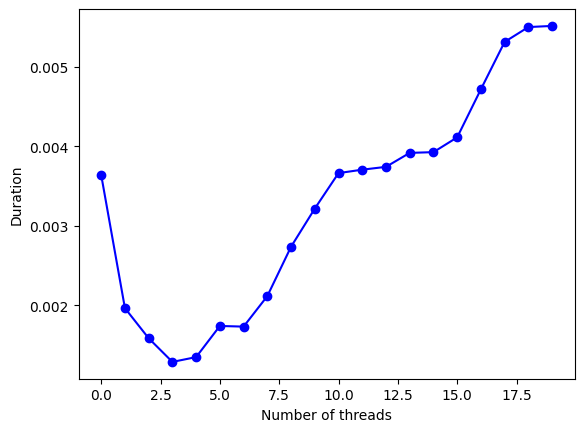

In [10]:
plt.plot(array, marker='o', linestyle='-', color='b')
plt.xlabel('Number of threads')
plt.ylabel('Duration')
plt.show()

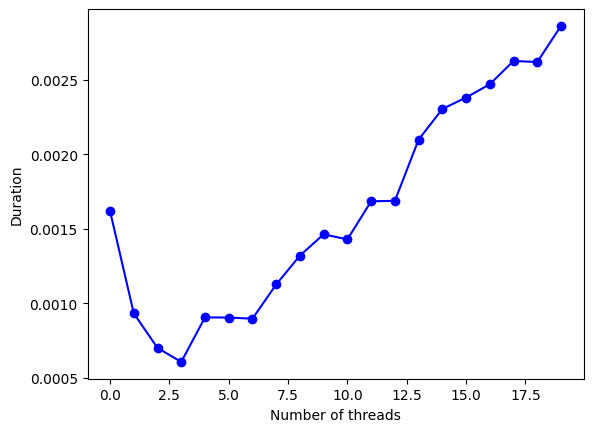

In [11]:
filename = 'dur_M_4_p_5'
array = read_array_from_txt(filename)

plt.plot(array, marker='o', linestyle='-', color='b')
plt.xlabel('Number of threads')
plt.ylabel('Duration')
plt.show()

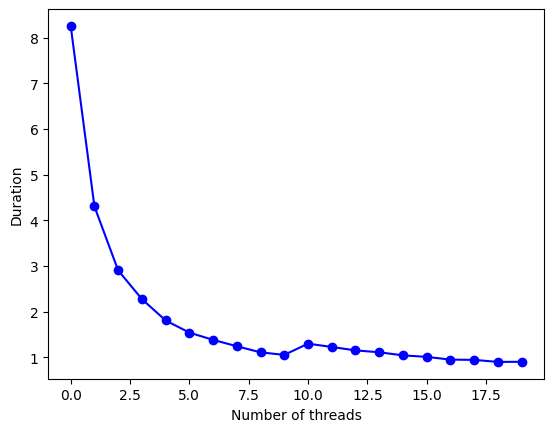

In [12]:
filename = 'dur_M_2_p_20'
array = read_array_from_txt(filename)

plt.plot(array, marker='o', linestyle='-', color='b')
plt.xlabel('Number of threads')
plt.ylabel('Duration')
plt.show()

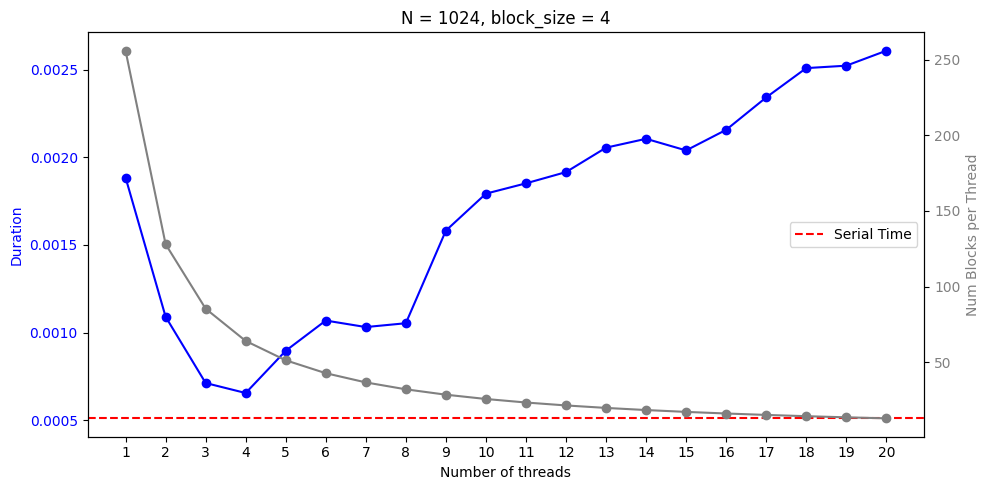

In [49]:
# Define the filename
filename = 'par_M_4_p_5'

serial_time = 0.00051186

M, p, N = get_M_p_N(filename)
num_blocks = N / M

# Read durations from the file
durs = read_array_from_txt(filename)

# Define number of threads
num_threads = [i + 1 for i in range(20)]

# Calculate num_blocks_per_thread
num_blocks_per_thread = [num_blocks / th for th in num_threads]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot durations on the first y-axis
ax1.plot(num_threads, durs, marker='o', linestyle='-', color='b')#, label='Durations')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Duration', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.axhline(y=serial_time, color='r', linestyle='--', label='Serial Time')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(num_threads, num_blocks_per_thread, marker='o', linestyle='-', color='grey')#, label='Num Blocks per Thread')
ax2.set_ylabel('Num Blocks per Thread', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')


ax1.legend(loc='right')

ax1.set_xticks(np.arange(min(num_threads), max(num_threads)+1, 1))

# Title
plt.title(f'N = {N}, block_size = {M}')

# Show the plot
fig.tight_layout()
plt.show()

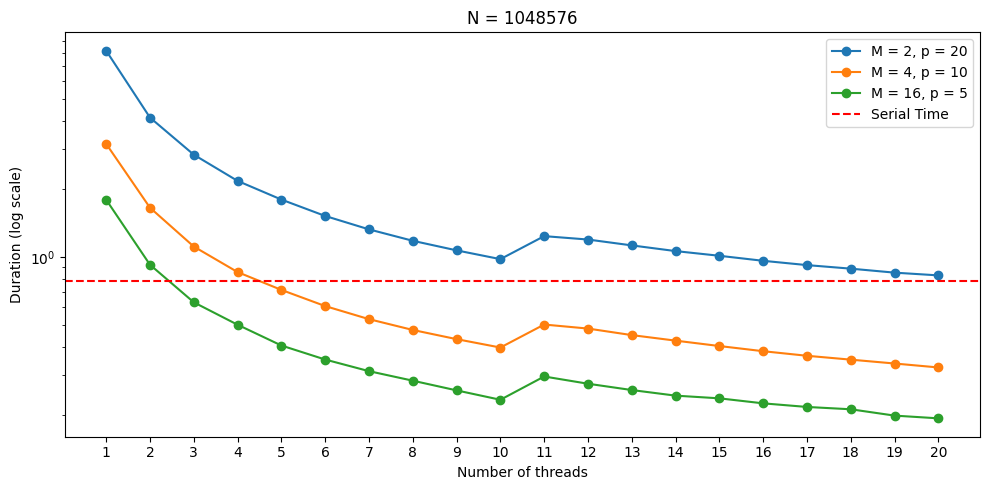

In [10]:
# Define the filename

serial_time = 0.780475

filenames = ["par_M_2_p_20", "par_M_4_p_10", "par_M_16_p_5"]
num_threads = [i + 1 for i in range(20)]
fig, ax1 = plt.subplots(figsize=(10, 5))


for i, filename in enumerate(filenames):
    M, p, N = get_M_p_N(filename)
    num_blocks = N / M
    durs = read_array_from_txt(filename)
    
    # Plot all durations on the same plot in log scale
    ax1.plot(num_threads, durs, marker='o', linestyle='-', label=f'M = {M}, p = {p}')

ax1.set_xticks(np.arange(min(num_threads), max(num_threads)+1, 1))


ax1.axhline(y=serial_time, color='r', linestyle='--', label='Serial Time')

# Set log scale for y-axis
ax1.set_yscale('log')

# Set labels and title
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Duration (log scale)')
plt.title(f'N = {N}')

# Add a legend
ax1.legend()

# Show the plot
fig.tight_layout()
plt.savefig('N_2_power10.png', bbox_inches='tight')
plt.show()

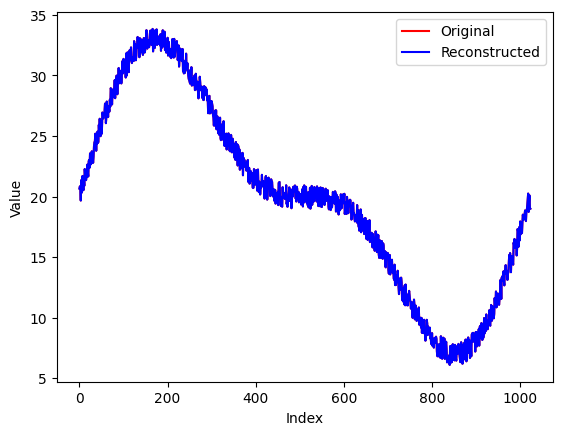

In [5]:
original = read_array_from_txt("generate_data.txt")
rec = read_array_from_txt("generate_data.txt")


x = np.arange(len(original))

# Plot the original and reconstructed arrays on the same plot
plt.plot(x, original, 'r-', label='Original')
plt.plot(x, rec, 'b-', label='Reconstructed')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

(-0.5, 639.5, 628.5, -0.5)

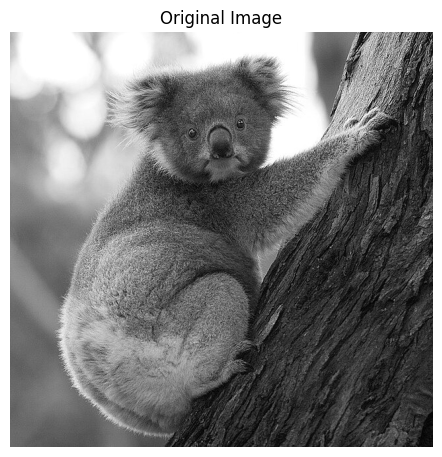

In [4]:
# Read the image
image = cv2.imread('koala.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

(629, 640)
Square image shape: (629, 629)


(-0.5, 149.5, 149.5, -0.5)

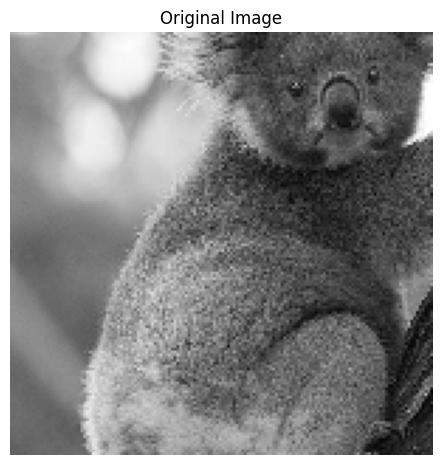

In [21]:

# Step 1: Read the image in grayscale mode
image = cv2.imread('koala.jpg', cv2.IMREAD_GRAYSCALE)

print(image.shape)

# Step 2: Truncate the image to a square
height, width = image.shape
if height > width:
    # Crop the height to make it a square
    start = (height - width) // 2
    square_image = image[start:start+width, :]
else:
    # Crop the width to make it a square
    start = (width - height) // 2
    square_image = image[:, start:start+height]

# Print the size of the square image
print("Square image shape:", square_image.shape)

resized_image = square_image[100:500, :400]

# Step 2: Resize the image to 200 by 200 pixels
resized_image = cv2.resize(resized_image, (150, 150))

# Display the original image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(resized_image, cmap='gray')
plt.axis('off')

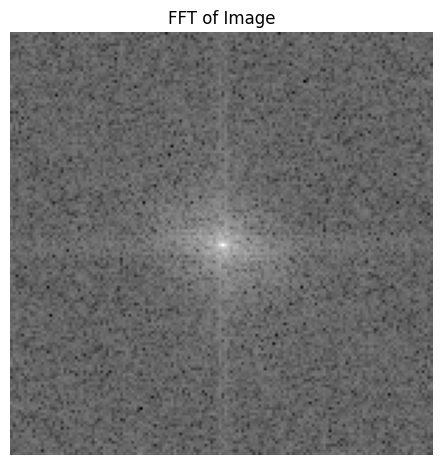

In [22]:
# Compute the FFT of the image
f = np.fft.fft2(resized_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.title('FFT of Image')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()

In [3]:
def dct_fast(x):
    
    N = len(x)
    
    v = np.zeros(len(x)) #empty_like(x)
    v[:(N-1)//2+1] = x[::2]

    if N % 2: # odd length
        v[(N-1)//2+1:] = x[-2::-2]
    else: # even length
        v[(N-1)//2+1:] = x[::-2]

    V = np.fft.fft(v)
    
    k = np.arange(N)
    if N % 2 == 0:
        factor = 2 * np.exp(-1j * np.pi * k / (2 * N))
    else:
        factor = 2 * np.exp(-1j * np.pi * k / (2 * N))
        factor[0] /= np.sqrt(2)
        factor[1:] *= np.sqrt(2)

    ret = (V * factor).real

    for k in range(len(ret)):
        if k == 0:
            ret[k] = ret[k]*np.sqrt(1/(4*N))
        else:
            ret[k] = ret[k]*np.sqrt(1/(2*N))

        
    return ret


def idct_fast(vXDct):
    
    numElements = len(vXDct)
    
    vGrid = np.arange(numElements)
    vShiftGrid = np.exp((1j * np.pi * vGrid) / (2 * numElements))
    vShiftGrid *= np.sqrt(2 * numElements)
    vShiftGrid[0] /= np.sqrt(2)
    
    vTmp = vShiftGrid * vXDct
    vTmp = np.real(np.fft.ifft(vTmp))
    
    vX = np.zeros(numElements)
    for ii in range(numElements // 2):
        vX[2 * ii] = vTmp[ii]
        vX[2 * ii + 1] = vTmp[numElements - ii - 1]
    
    return vX


In [4]:
def get_Psi(n):
    # Initialize an empty matrix
    Psi = np.zeros((n, n))
    
    # Generate the identity matrix
    I = np.eye(n)
    
    # Populate Psi using dct_fast
    for i in range(n):
        Psi[:, i] = dct_fast(I[:, i])
    
    return Psi

/users/eleves-b/2021/antonia.baies/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/linear_model/_omp.py:435: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(


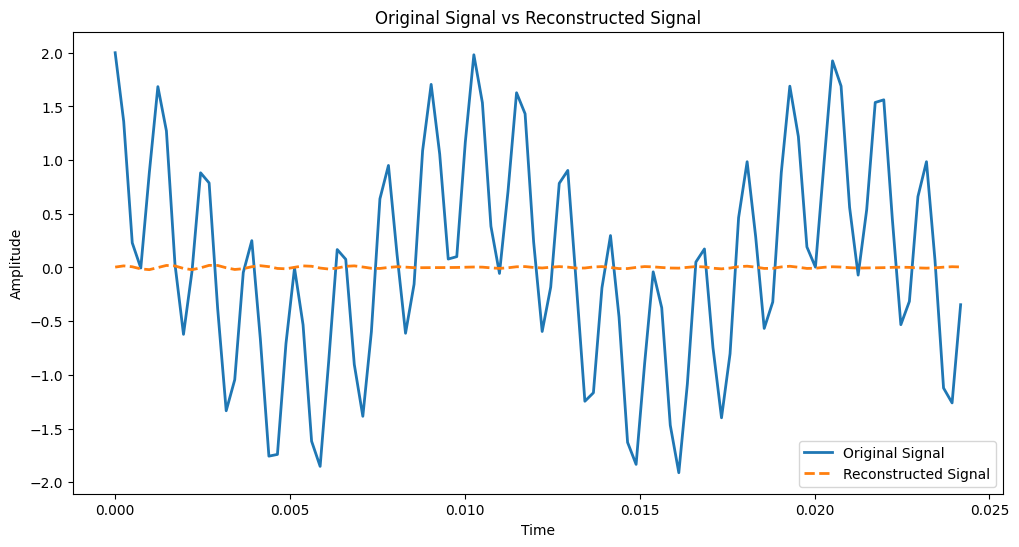

In [7]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from cosamp import cosamp

# Parameters
n = 4096  # points in high resolution signal
t = np.linspace(0, 1, n)
x = np.cos(2 * 97 * np.pi * t) + np.cos(2 * 777 * np.pi * t)

# Fourier transformed signal and Power Spectral Density (PSD)
xt = np.fft.fft(x)
PSD = xt * np.conj(xt) / n

# Randomly sample signal
p = 128  # num. random samples, p=n/32
perm = np.random.choice(n, p, replace=False)
x_sparse = dct_fast(x)
#y = x[perm]  # compressed measurement
y = x_sparse[perm]

# Build Psi and Theta
#Psi = dct(np.eye(n), norm='ortho')
#Psi = get_Psi(n)
#Theta = Psi[perm, :]
Theta = np.identity(n)
Theta = Theta[perm]

# CS via CoSaMP
#s = cosamp.cosamp(Theta, y, s=10, tol=1.e-10, max_iter=10)
omp = OrthogonalMatchingPursuit()
omp.fit(Theta, y)
s = omp.coef_
xrecon = idct_fast(s)

# Plot original vs reconstructed signal
plt.figure(figsize=(12, 6))
plt.plot(t[:100], x[:100], label='Original Signal', linewidth=2)
plt.plot(t[:100], xrecon[:100], label='Reconstructed Signal', linestyle='dashed', linewidth=2)
plt.legend()
plt.title('Original Signal vs Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Reconstruction error: 7.91378075750298


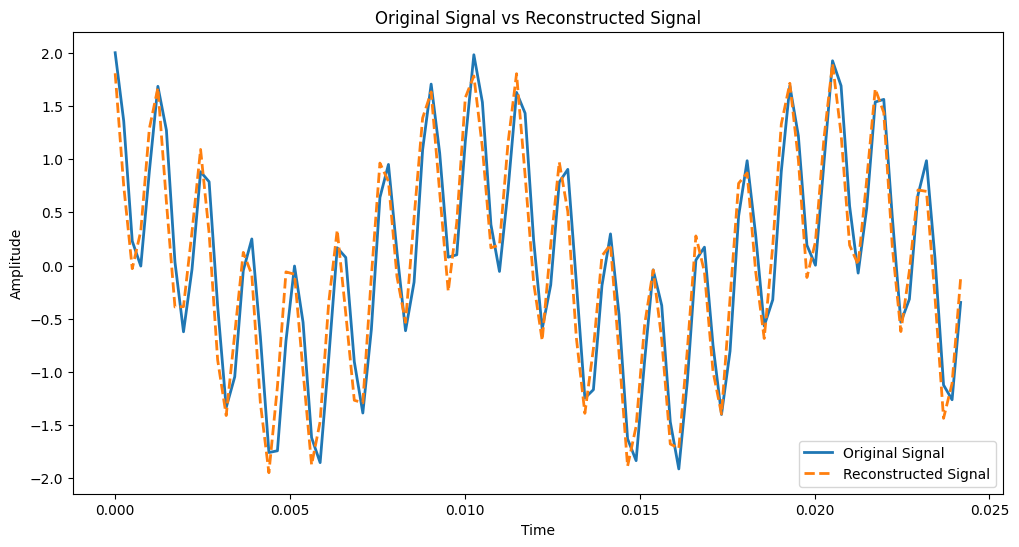

In [11]:
n = 4096  # points in high-resolution signal
t = np.linspace(0, 1, n)
x = np.cos(2 * 97 * np.pi * t) + np.cos(2 * 777 * np.pi * t)

# Transform the signal to the DCT domain
x_dct = dct(x, norm='ortho')

# Randomly sample DCT coefficients using a normal matrix
p = 128  # number of random samples, p=n/32
Phi = np.random.randn(p, n)

# Compressed measurement
y = Phi @ x_dct

# Build Theta
Theta = Phi @ np.eye(n)  # Theta is effectively Phi since Psi is I in DCT domain

# CS via OMP
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=10)  # Set number of non-zero coefficients
omp.fit(Theta, y)
s = omp.coef_

# Reconstruct the signal
x_recon_dct = s
x_recon = idct(x_recon_dct, norm='ortho')

# Verify reconstruction
print("Reconstruction error:", np.linalg.norm(x - xrecon))

# Plot original and reconstructed signals
import matplotlib.pyplot as plt


# Plot original vs reconstructed signal
plt.figure(figsize=(12, 6))
plt.plot(t[:100], x[:100], label='Original Signal', linewidth=2)
plt.plot(t[:100], xrecon[:100], label='Reconstructed Signal', linestyle='dashed', linewidth=2)
plt.legend()
plt.title('Original Signal vs Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [63]:
import numpy as np
from scipy.fftpack import dct, idct

def dft(x):
    """Compute the Discrete Fourier Transform of the 1D array x"""
    return np.fft.fft(x)

# Example usage:
# Generate a test signal
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])


# Convert DFT to DCT (manual conversion)


#a = dct(x, type=2, norm='ortho')
a = dct_fast_ortho(x)
b = idct_fast(a)


# Check if both outputs are the same
if np.allclose(x, b):
    print("Both DCT outputs are the same.")
else:
    print("DCT outputs differ.")
    
print(x)
print(b)


Both DCT outputs are the same.
[1 2 3 4 5 6 7 8]
[1. 2. 3. 4. 5. 6. 7. 8.]


In [43]:
# Example vector
x = np.array([1, 2, 3, 4, 5])

# Apply DCT
x_dct = dct(x, norm='ortho')  # type=2 for the DCT-II, which is commonly used

# Apply IDCT
x_idct = idct(x_dct, norm='ortho')  # type=2 for the IDCT-II, corresponding to DCT-II

# Print original vector and reconstructed vector
print("Original vector:", x)
print("Reconstructed vector after IDCT:", x_idct)

# Compare original and reconstructed vectors
print("Difference (should ideally be very small):", np.linalg.norm(x - x_idct))

Original vector: [1 2 3 4 5]
Reconstructed vector after IDCT: [1. 2. 3. 4. 5.]
Difference (should ideally be very small): 1.472877282518059e-15


In [37]:
numElements = 10

# Signal (DCT Coefficients)
vXDct = np.random.randn(numElements)

# Reference Inverse IDCT
vXRef = idct(vXDct, norm='ortho')

# Inverse IDCT Using FFT
vGrid = np.arange(numElements)
vShiftGrid = np.exp((1j * np.pi * vGrid) / (2 * numElements))
vShiftGrid *= np.sqrt(2 * numElements)
vShiftGrid[0] /= np.sqrt(2)

vTmp = vShiftGrid * vXDct
vTmp = np.real(np.fft.ifft(vTmp))

vX = np.zeros(numElements)

for ii in range(numElements // 2):
    vX[2 * ii] = vTmp[ii]
    vX[2 * ii + 1] = vTmp[numElements - ii - 1]

print("vXRef:")
print(vXRef)
print("vX:")
print(vX)

vXRef:
[ 1.83228209  0.50622042  0.52196969  1.2576799   1.4985664  -0.08955324
 -0.16698231 -1.87585264  0.99821881  1.17017467]
vX:
[ 1.83228209  0.50622042  0.52196969  1.2576799   1.4985664  -0.08955324
 -0.16698231 -1.87585264  0.99821881  1.17017467]


In [12]:
def dct_ours(x):
    u = np.zeros(4 * N)
    u[1:2*N:2] = x
    u[2*N+1::2] = x[::-1]

    U = np.fft.fft(u)[:N]
    return U.real

In [51]:
x = np.array([1, 2, 3, 4, 5])

# Compute DCT using dct(x)
x_dct = dct(x, type=2)

# Length of the vector
N = len(x)

# Adjust for ortho-normalized DCT
x_dct_ortho = x_dct * np.sqrt(2 / N)

# Compute DCT using dct(x, 'ortho') for comparison
x_dct_ortho_np = dct(x, type=2, norm='ortho')

# Print both outputs for comparison
print("DCT(x) output:\n", x_dct)
print("\nDCT(x) with 'ortho' normalization:\n", x_dct_ortho_np)
print("\nAdjusted DCT(x) to match 'ortho' normalization:\n", x_dct_ortho)

DCT(x) output:
 [ 3.00000000e+01 -9.95959314e+00  1.11022302e-16 -8.98055953e-01
  8.88178420e-16]

DCT(x) with 'ortho' normalization:
 [ 6.70820393e+00 -3.14949989e+00  5.55111512e-17 -2.83990228e-01
  2.22044605e-16]

Adjusted DCT(x) to match 'ortho' normalization:
 [ 1.89736660e+01 -6.29899978e+00  7.02166694e-17 -5.67980456e-01
  5.61733355e-16]
